# This notebook will be used to figure out why catechin 14, 21, and 35 are different. 

- Our first line of reasoning will be to see which sets of vOTUs are even active, and to compare the rank abundance of all vOTUs in each. 
- Next we will try to determine why it is these vOTUs that are the most dominant.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
melted_df = pd.read_csv('../../data/02-relative-abundance/metaT/1_gene_per_10_kb/transcript_abundance_melted_df.csv')
print(melted_df.vOTU.nunique())
with open('../../data/01-build-vOTU-database/vOTUs/present_metaT_vOTUs_post_manual_curation_1_gene_per_10_kb.txt', 'r') as f:
    curated_vOTUs = [i.strip() for i in f.readlines()]

melted_df = melted_df.loc[melted_df['vOTU'].isin(curated_vOTUs)]

3287


In [3]:
melted_df.vOTU.nunique()

3287

In [4]:
# idk why this one is missing but will ignore for now
set(curated_vOTUs) - set(melted_df.vOTU)

{'20120700_E2X.VIRSorter_NODE_64052_length_6357_cov_2_997620-cat_2'}

In [5]:
melted_df.head()

,Sample,day,treatment,vOTU,abundance
0,STM_0716_E_M_E002,0,unamended,20100900_E1D.VIRSorter_NODE_1646_length_12567_...,0.212474
1,STM_0716_E_M_E003,0,unamended,20100900_E1D.VIRSorter_NODE_1646_length_12567_...,0.120811
2,STM_0716_E_M_E004,0,unamended,20100900_E1D.VIRSorter_NODE_1646_length_12567_...,0.459155
3,STM_0716_E_M_E025,14,unamended,20100900_E1D.VIRSorter_NODE_1646_length_12567_...,0.020138
4,STM_0716_E_M_E027,14,unamended,20100900_E1D.VIRSorter_NODE_1646_length_12567_...,0.035929


In [6]:
len(melted_df), len(melted_df.loc[melted_df['abundance'] > 0])

(121619, 54725)

In [7]:
# add replicates
replicate_frame = pd.DataFrame({
    'STM_0716_E_M_E002_unamended_0': 1,
    'STM_0716_E_M_E003_unamended_0': 2,
       'STM_0716_E_M_E004_unamended_0': 3,
    'STM_0716_E_M_E025_unamended_14': 1,
       'STM_0716_E_M_E027_unamended_14': 2,
    'STM_0716_E_M_E029_CT_14': 1,
       'STM_0716_E_M_E030_CT_14': 2,
    'STM_0716_E_M_E031_CT_14': 3,
       'STM_0716_E_M_E033_catechin_14': 1,
    'STM_0716_E_M_E034_catechin_14': 2,
       'STM_0716_E_M_E035_catechin_14': 3,
    'STM_0716_E_M_E050_unamended_21': 1,
       'STM_0716_E_M_E051_unamended_21': 2,
    'STM_0716_E_M_E052_unamended_21': 3,
       'STM_0716_E_M_E054_CT_21': 1,
    'STM_0716_E_M_E055_CT_21': 2,
       'STM_0716_E_M_E056_CT_21': 3,
    'STM_0716_E_M_E058_catechin_21': 1,
       'STM_0716_E_M_E059_catechin_21': 2,
    'STM_0716_E_M_E060_catechin_21': 3,
       'STM_0716_E_M_E062_unamended_35': 1,
    'STM_0716_E_M_E063_unamended_35': 2,
       'STM_0716_E_M_E064_unamended_35': 3,
    'STM_0716_E_M_E066_CT_35': 1,
       'STM_0716_E_M_E067_CT_35': 2,
    'STM_0716_E_M_E068_CT_35': 3,
       'STM_0716_E_M_E070_catechin_35': 1,
    'STM_0716_E_M_E071_catechin_35': 2,
       'STM_0716_E_M_E072_catechin_35': 3,
    'STM_0716_E_M_E121_unamended_7': 1,
       'STM_0716_E_M_E122_unamended_7': 2,
    'STM_0716_E_M_E123_unamended_7': 3,
       'STM_0716_E_M_E125_CT_7': 1,
    'STM_0716_E_M_E126_CT_7': 2,
       'STM_0716_E_M_E127_CT_7': 3,
    'STM_0716_E_M_E129_catechin_7': 1,
       'STM_0716_E_M_E130_catechin_7': 2,
    'STM_0716_E_M_E131_catechin_7': 3
}.items())

In [8]:
replicates = pd.concat([replicate_frame[0].str.rsplit('_', 2, expand=True), replicate_frame[1]], axis=1)
replicates.columns=['Sample', 'treatment', 'day', 'replicate']
replicates['day'] = replicates['day'].astype(int)

In [9]:
# How many are present for each day/timepoint?
vOTUs_per_sample = (
    melted_df
    .loc[melted_df['abundance'] > 0]
    .groupby(['Sample'])
    .aggregate({'vOTU': 'count'})
).reset_index().rename(columns={'vOTU': 'nunique_vOTUs'})

In [10]:
sample_day_treatment = melted_df[['Sample', 'day', 'treatment']].drop_duplicates()
sample_day_treatment = sample_day_treatment.merge(replicates, on=['Sample', 'day', 'treatment'])
sample_day_treatment

,Sample,day,treatment,replicate
0,STM_0716_E_M_E002,0,unamended,1
1,STM_0716_E_M_E003,0,unamended,2
2,STM_0716_E_M_E004,0,unamended,3
3,STM_0716_E_M_E025,14,unamended,1
4,STM_0716_E_M_E027,14,unamended,2
5,STM_0716_E_M_E029,14,CT,1
6,STM_0716_E_M_E030,14,CT,2
7,STM_0716_E_M_E031,14,CT,3
8,STM_0716_E_M_E033,14,catechin,1
9,STM_0716_E_M_E034,14,catechin,2


In [11]:
vOTUs_per_sample = sample_day_treatment.merge(vOTUs_per_sample, on='Sample')
melted_df = melted_df.merge(sample_day_treatment, on=['Sample', 'day', 'treatment'])

In [12]:
vOTUs_per_sample.sort_values(by='nunique_vOTUs')

,Sample,day,treatment,replicate,nunique_vOTUs
7,STM_0716_E_M_E031,14,CT,3,950
6,STM_0716_E_M_E030,14,CT,2,1019
5,STM_0716_E_M_E029,14,CT,1,1079
1,STM_0716_E_M_E003,0,unamended,2,1153
26,STM_0716_E_M_E070,35,catechin,1,1190
27,STM_0716_E_M_E071,35,catechin,2,1193
20,STM_0716_E_M_E062,35,unamended,1,1200
22,STM_0716_E_M_E064,35,unamended,3,1229
34,STM_0716_E_M_E127,7,CT,3,1292
33,STM_0716_E_M_E126,7,CT,2,1297


In [13]:
# spot check the functions worked correctly, should be 1856
melted_df.loc[(melted_df['abundance'] > 0) & (melted_df['Sample'] == 'STM_0716_E_M_E034')].vOTU.nunique()

1856

## Our observations: 

Our hypothesis that there are simply fewer vOTUs is wrong! This is probably most similar to the Jaccard comparison where there are many rares. Turns out there is still a lot of active members and is very rich, but the distribution of abundance may be heavily skewed towards a few viruses. This is still good information: the catechin samples do have high species richness, and the highest is almost double the lowest of condensed tannin 14, which all seem to have the lowest active vOTUs.

Next, we must investigate rank abundance curves and the most abundant species

### We can try to figure out what are the same amongst the catechin, and what makes them different from the the non-catechin in a systematic way? SIMPER analysis potentially in R?

In [14]:
melted_df["rank"] = melted_df.groupby("Sample")["abundance"].rank(method="dense", ascending=False)


In [15]:
melted_df

,Sample,day,treatment,vOTU,abundance,replicate,rank
0,STM_0716_E_M_E002,0,unamended,20100900_E1D.VIRSorter_NODE_1646_length_12567_...,0.212474,1,442.0
1,STM_0716_E_M_E002,0,unamended,20100900_E1D.VIRSorter_NODE_1718_length_12231_...,0.095603,1,759.0
2,STM_0716_E_M_E002,0,unamended,20100900_E1D.VIRSorter_NODE_3261_length_8282_c...,0.208638,1,446.0
3,STM_0716_E_M_E002,0,unamended,20100900_E1D.VIRSorter_NODE_789_length_20219_c...,0.100035,1,741.0
4,STM_0716_E_M_E002,0,unamended,20100900_E2D.VIRSorter_NODE_22_length_61003_co...,0.241140,1,399.0
...,...,...,...,...,...,...,...
121614,STM_0716_E_M_E130,7,catechin,STM_0716_E_M_E069_megahit_k121_86451_provirus_...,0.000000,2,1419.0
121615,STM_0716_E_M_E130,7,catechin,STM_0716_S_M_E013_A_bin.16_k121_1016385,0.000000,2,1419.0
121616,STM_0716_E_M_E130,7,catechin,STM_0716_S_M_E013_A_bin.75_k121_1369512,0.000000,2,1419.0
121617,STM_0716_E_M_E130,7,catechin,STM_0716_S_M_E013_D_bin.53_k121_344968,0.000000,2,1419.0


In [16]:
df = melted_df

catechin_samples = df[(df["treatment"] == "catechin") & (df["day"] >= 14)]

# Get vOTUs that are highly ranked (e.g., top 50 in any sample)
top_vOTUs = catechin_samples[catechin_samples["rank"] <= 50]["vOTU"].unique()

# Filter the main dataframe to include only these vOTUs
df_filtered = df[df["vOTU"].isin(top_vOTUs)]

In [17]:
df_filtered

,Sample,day,treatment,vOTU,abundance,replicate,rank
993,STM_0716_E_M_E002,0,unamended,Fen.Unlabelled.R1.T1.F1.JGI.BFC.metaspades_bin...,0.264666,1,379.0
997,STM_0716_E_M_E002,0,unamended,Fen.Unlabelled.R1.T1.F1.JGI.BFC.metaspades_bin...,0.000000,1,1487.0
999,STM_0716_E_M_E002,0,unamended,Fen.Unlabelled.R1.T1.F1.trimmomatic.metaspades...,0.020458,1,1233.0
1007,STM_0716_E_M_E002,0,unamended,Fen.Unlabelled.R2.T1.F1.JGI.BFC.metaspades_bin...,0.308883,1,332.0
1031,STM_0716_E_M_E002,0,unamended,Fen.Unlabelled.R3.T2.F3.trimmomatic.megahit_bi...,0.059524,1,935.0
...,...,...,...,...,...,...,...
121593,STM_0716_E_M_E130,7,catechin,STM_0716_E_M_E069_megahit_k121_1989428_proviru...,0.000000,2,1419.0
121598,STM_0716_E_M_E130,7,catechin,STM_0716_E_M_E069_megahit_k121_2465135,0.000000,2,1419.0
121603,STM_0716_E_M_E130,7,catechin,STM_0716_E_M_E069_megahit_k121_2933972__full,5.298618,2,58.0
121607,STM_0716_E_M_E130,7,catechin,STM_0716_E_M_E069_megahit_k121_3330775,0.031318,2,1179.0


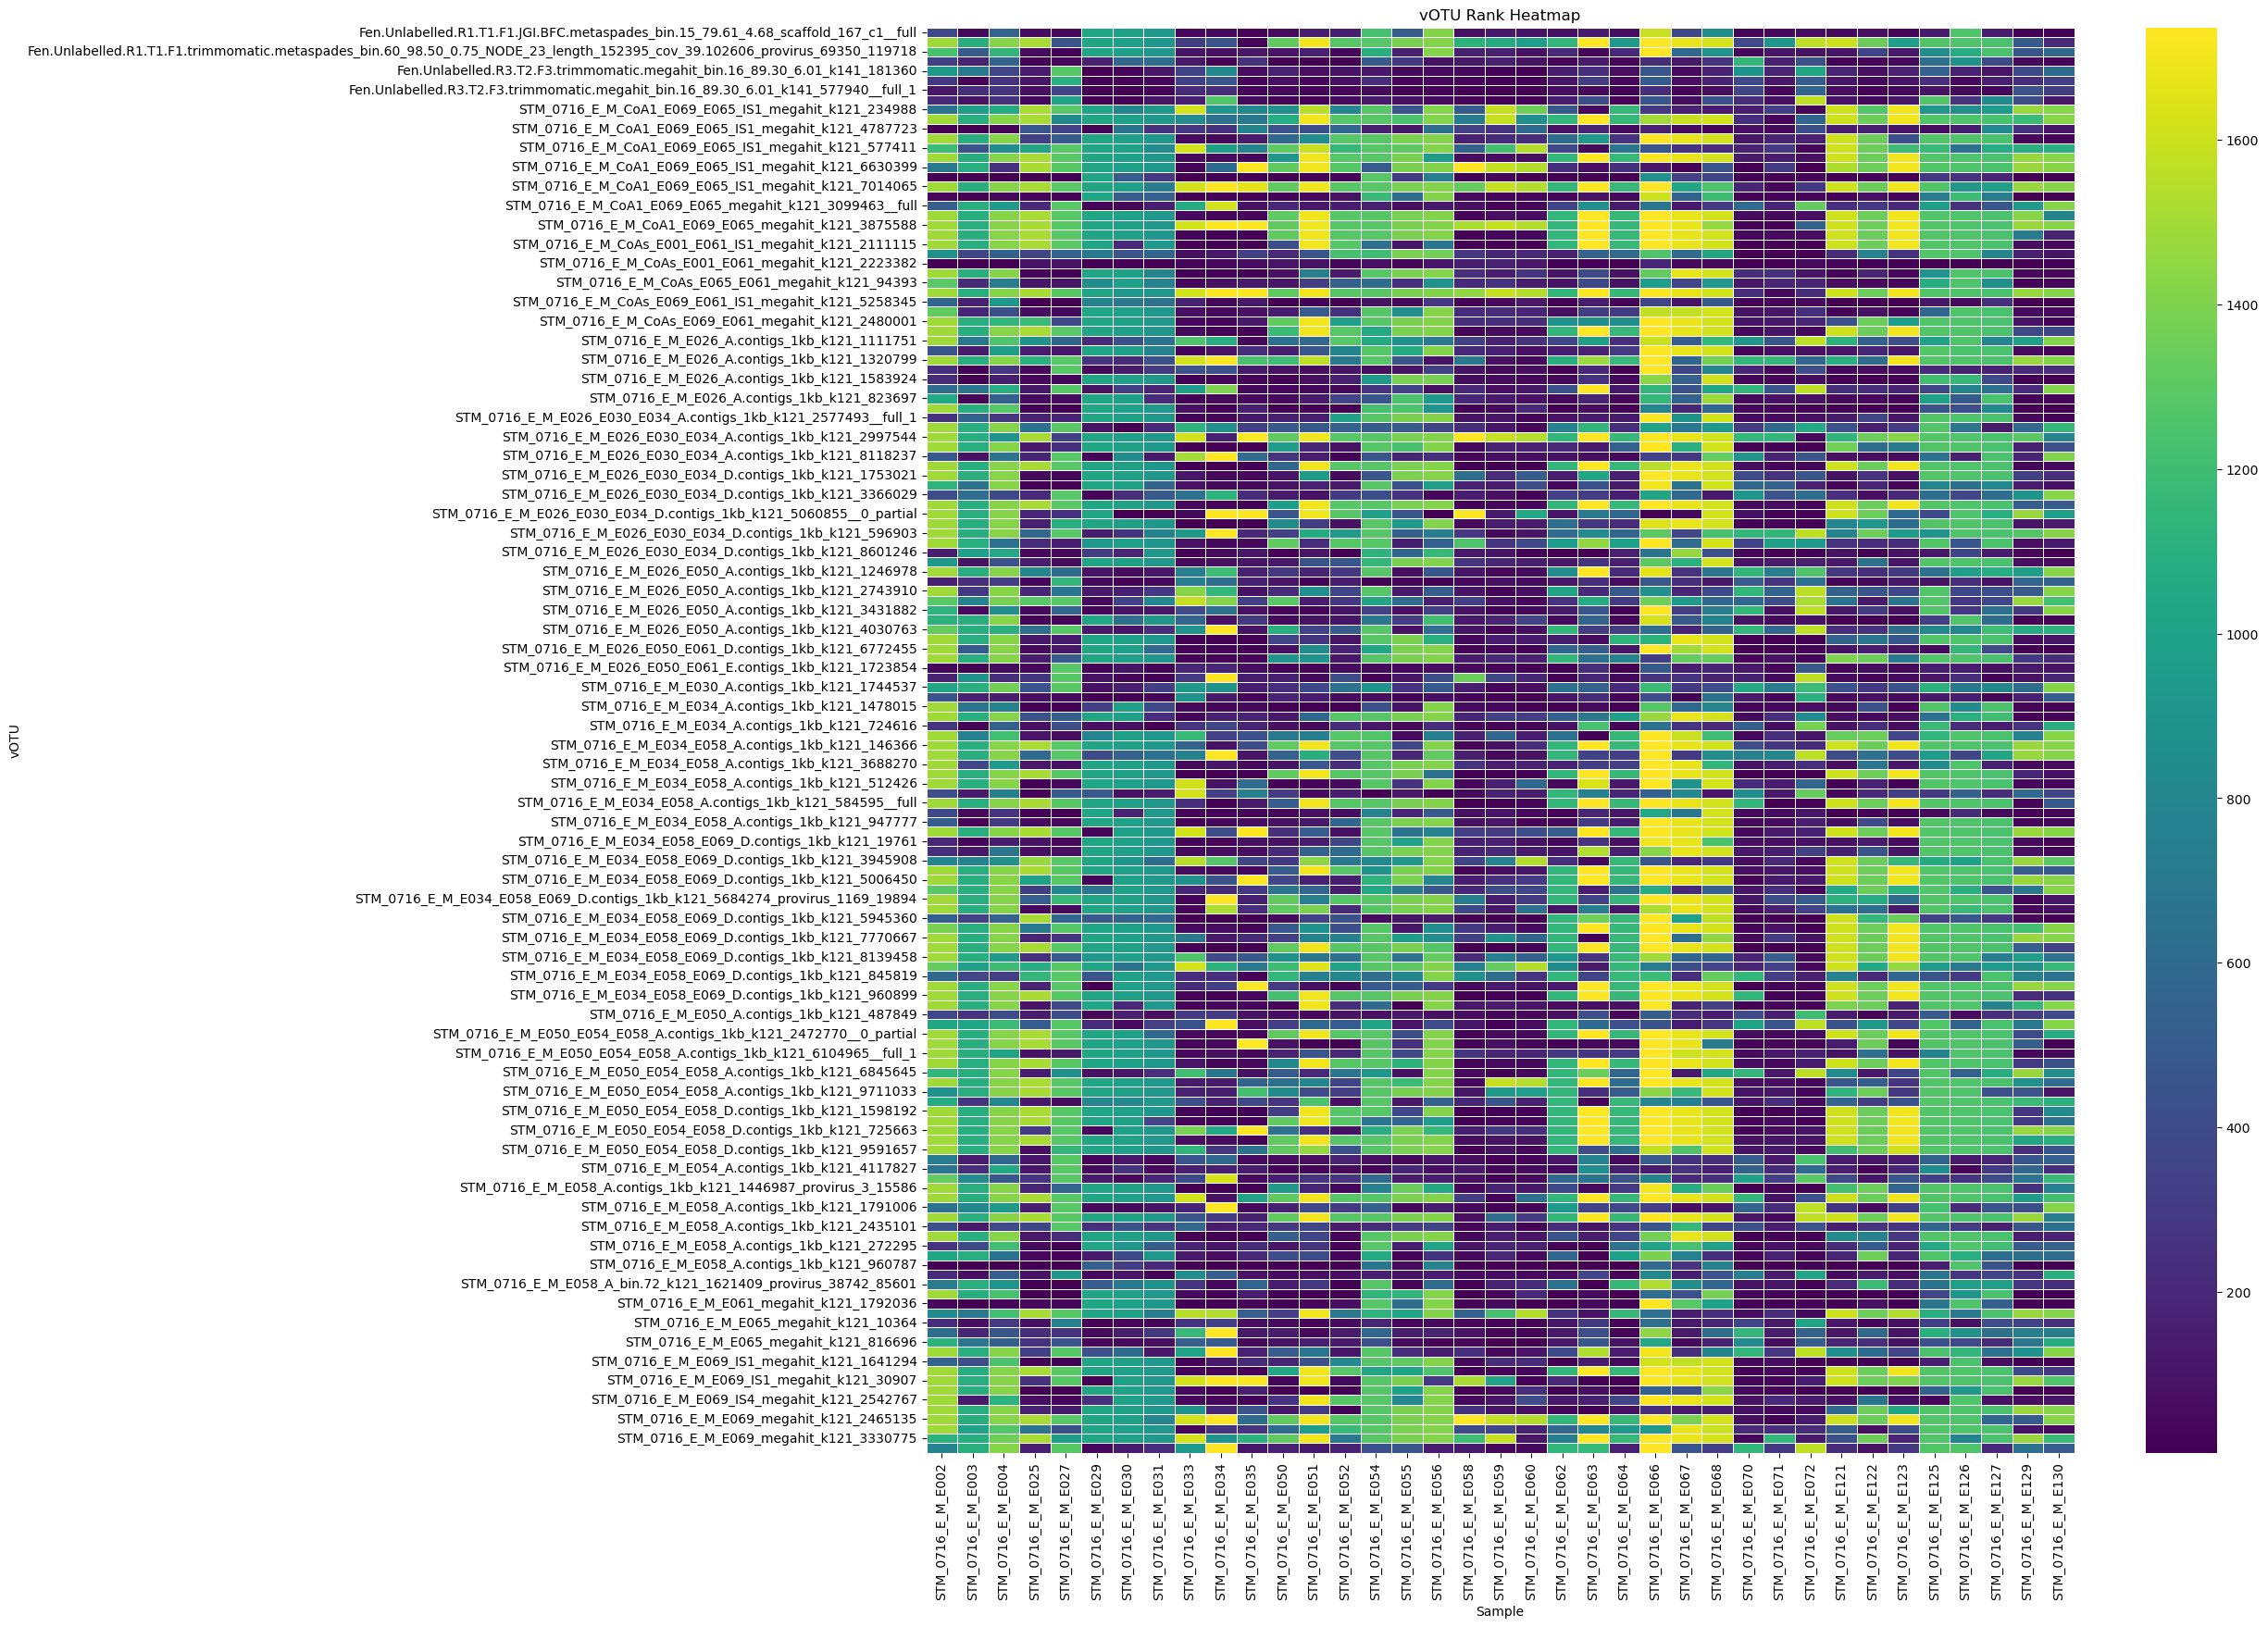

In [18]:
# Pivot the data: vOTUs as rows, Samples as columns, Rank as values
heatmap_data = df_filtered.pivot(index="vOTU", columns="Sample", values="rank")

# Define color palette for the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, cmap="viridis", robust=True, linewidths=0.5)

# Labeling and title
plt.title("vOTU Rank Heatmap")
plt.xlabel("Sample")
plt.ylabel("vOTU")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.savefig('../../figures/phage_abundance/no_sig_indicator/rank_heatmap_all.png', dpi=300)

# Show plot
plt.show()

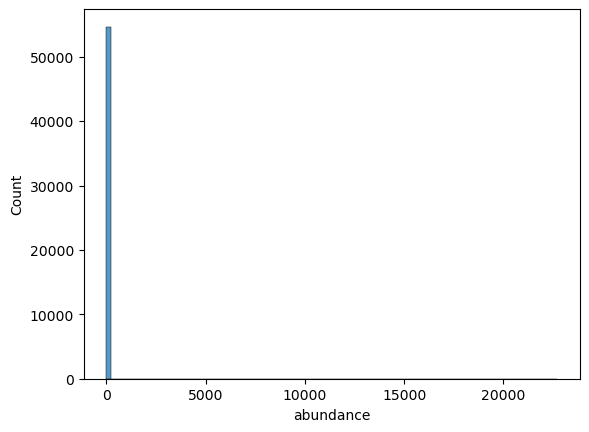

In [19]:
# choose a proper normalization method to compare abundance values in heatmap for visual purposes
# need to capture small and large variations
sns.histplot(df.loc[df['abundance'] > 0]['abundance'], bins=100)
plt.show()

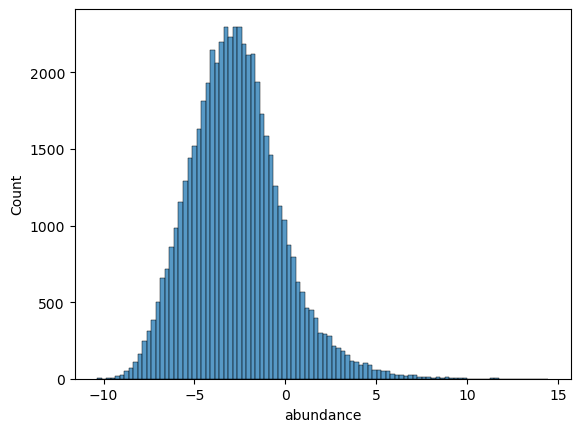

In [20]:
sns.histplot(df.loc[df['abundance'] > 0]['abundance'].apply(lambda x: np.log2(x+0.00001)), bins=100)
plt.show()

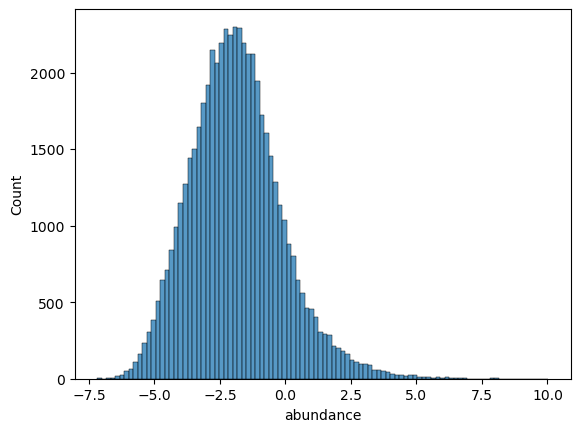

In [21]:
sns.histplot(df.loc[df['abundance'] > 0]['abundance'].apply(lambda x: np.log(x)), bins=100)
plt.show()

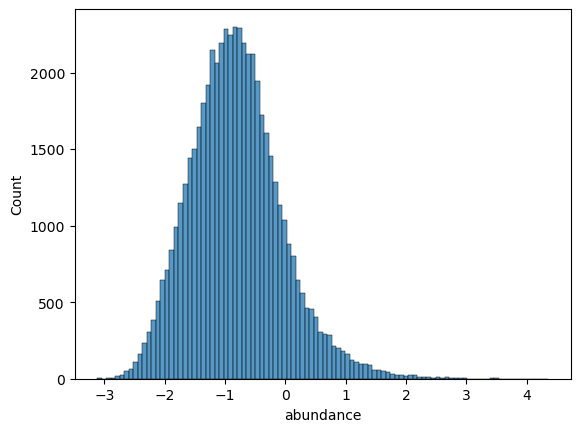

In [22]:
sns.histplot(df.loc[df['abundance'] > 0]['abundance'].apply(lambda x: np.log10(x)), bins=100)
plt.show()

In [23]:
min_value = df['abundance'].min()
shift_value = 1 - min_value  # Shift all values so that the minimum is 1
transformed_data = np.log2(df['abundance'] + shift_value)

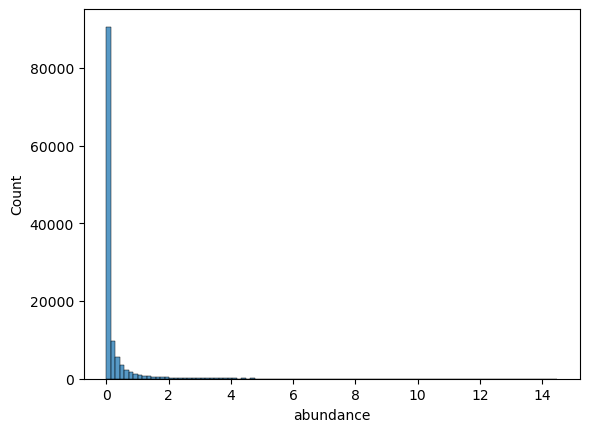

In [24]:
sns.histplot(transformed_data, bins=100)
plt.show()

## We'll go with log2 with a small offset for now

/Users/riddellj/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1600x1000 with 0 Axes>

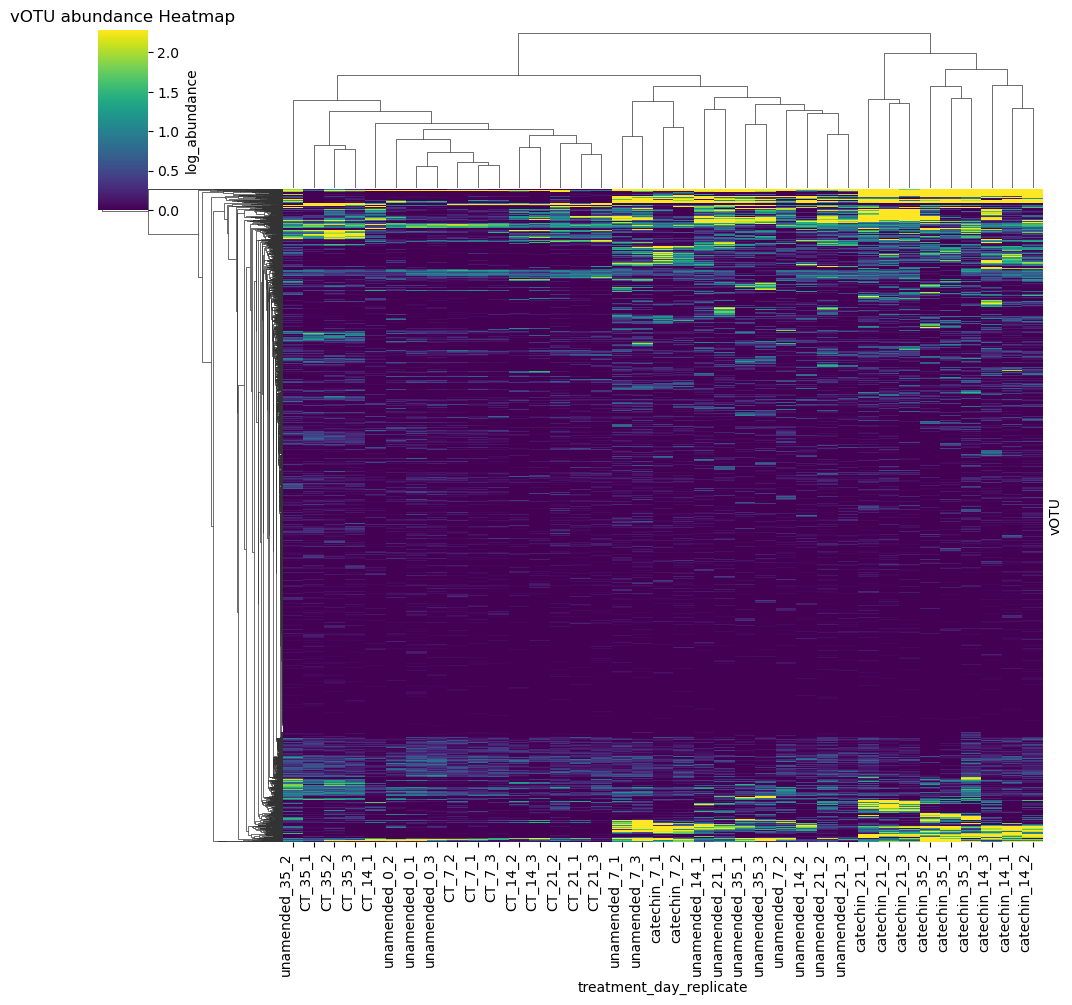

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df.sort_values(by=['treatment', 'day', 'replicate'], ascending=[True, True, True])

min_value = df['abundance'].min()
shift_value = 1 - min_value
df['log_abundance'] = df['abundance'].apply(lambda x: np.log2(x+shift_value))
# Create a new column combining treatment and day
df["treatment_day_replicate"] = df["treatment"] + "_" + df["day"].astype(str) + '_' + df["replicate"].astype(str)

# Pivot for heatmap
heatmap_data = df.pivot(index="vOTU", columns="treatment_day_replicate", values="log_abundance")
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns, key=lambda x: (x.split("_")[0], int(x.split("_")[1]))), axis=1)

# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.clustermap(heatmap_data, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Show plot
plt.show()

## Finally! These clustering of samples closely match the NMDS
## Now we need to figure out which vOTUs are responsible for the close clustering of the catechin

In [26]:
import pandas as pd



# Compute mean abundance for each vOTU within each treatment
mean_abundance = df.groupby(["vOTU", "treatment"])["abundance"].mean().unstack()

# Add a small pseudocount to avoid division by zero issues
pseudocount = 1e-6
mean_abundance += pseudocount

# Calculate log2 fold change (LFC)
mean_abundance["LFC_catechin_vs_unamended"] = np.log2(
    mean_abundance["catechin"] / mean_abundance["unamended"]
)

mean_abundance["LFC_catechin_vs_CT"] = np.log2(
    mean_abundance["catechin"] / mean_abundance["CT"]
)


# Identify vOTUs with highest LFC in catechin
top_vOTUs = mean_abundance.sort_values(by="LFC_catechin_vs_unamended", ascending=False).reset_index()
top_vOTUs


treatment,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT
0,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948
1,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406
2,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431
3,STM_0716_E_M_CoA1_E069_E065_megahit_k121_64172...,0.000001,23.412589,0.000001,24.480781,24.480781
4,STM_0716_E_M_E050_E054_E058_A.contigs_1kb_k121...,0.030027,17.004416,0.000001,24.019406,9.145431
...,...,...,...,...,...,...
3282,STM_0716_E_M_E026_E050_A.contigs_1kb_k121_569858,0.012415,0.000001,0.418475,-18.674783,-13.599773
3283,STM_0716_E_M_E026_E050_E061_D.contigs_1kb_k121...,0.000001,0.000001,0.472170,-18.848947,0.000000
3284,STM_0716_E_M_CoAs_E001_E061_megahit_k121_1699602,0.080406,0.000001,0.474478,-18.855981,-16.295008
3285,STM_0716_E_M_E050_A.contigs_1kb_k121_2685835,0.010408,0.000001,0.488441,-18.897826,-13.345422


In [27]:
top_vOTUs.sort_values(by=['catechin', 'LFC_catechin_vs_unamended'], ascending=False)

treatment,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT
121,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.346788,6248.452934,0.722849,13.077518,14.137155
211,STM_0716_E_M_E026_E050_E061_D.contigs_1kb_k121...,0.007326,560.126663,0.837047,9.386228,16.222452
0,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948
218,STM_0716_E_M_CoAs_E001_E061_IS2_megahit_k121_1...,0.059948,277.079673,0.540894,9.000740,12.174297
648,STM_0716_E_M_E058_A.contigs_1kb_k121_960787,0.386471,274.231000,64.151946,2.095827,9.470816
...,...,...,...,...,...,...
3282,STM_0716_E_M_E026_E050_A.contigs_1kb_k121_569858,0.012415,0.000001,0.418475,-18.674783,-13.599773
3283,STM_0716_E_M_E026_E050_E061_D.contigs_1kb_k121...,0.000001,0.000001,0.472170,-18.848947,0.000000
3284,STM_0716_E_M_CoAs_E001_E061_megahit_k121_1699602,0.080406,0.000001,0.474478,-18.855981,-16.295008
3285,STM_0716_E_M_E050_A.contigs_1kb_k121_2685835,0.010408,0.000001,0.488441,-18.897826,-13.345422


In [28]:
top_vOTUs['LFC_catechin_vs_unamended_ABS'] = top_vOTUs['LFC_catechin_vs_unamended'].apply(lambda x: abs(x))
top_vOTUs = top_vOTUs.sort_values(by='LFC_catechin_vs_unamended_ABS', ascending=False)
top_vOTUs

treatment,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS
0,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490
1,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356
2,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019
3,STM_0716_E_M_CoA1_E069_E065_megahit_k121_64172...,0.000001,23.412589,0.000001,24.480781,24.480781,24.480781
4,STM_0716_E_M_E050_E054_E058_A.contigs_1kb_k121...,0.030027,17.004416,0.000001,24.019406,9.145431,24.019406
...,...,...,...,...,...,...,...
1610,20110600_S1D.VIRSorter_NODE_4778_length_7106_c...,0.000265,0.000001,0.000001,0.000000,-8.049869,0.000000
1611,20120700_P3D.VIRSorter_NODE_76425_length_6564_...,0.000554,0.000001,0.000001,0.000000,-9.114326,0.000000
1612,20120700_P3D.VIRSorter_NODE_89760_length_5784_...,0.000629,0.000001,0.000001,0.000000,-9.296652,0.000000
1613,20120700_P3D.VIRSorter_NODE_92294_length_5658_...,0.003050,0.000001,0.000001,0.000000,-11.574675,0.000000


In [29]:
top_vOTUs_list = top_vOTUs.iloc[:50,:].vOTU.tolist()

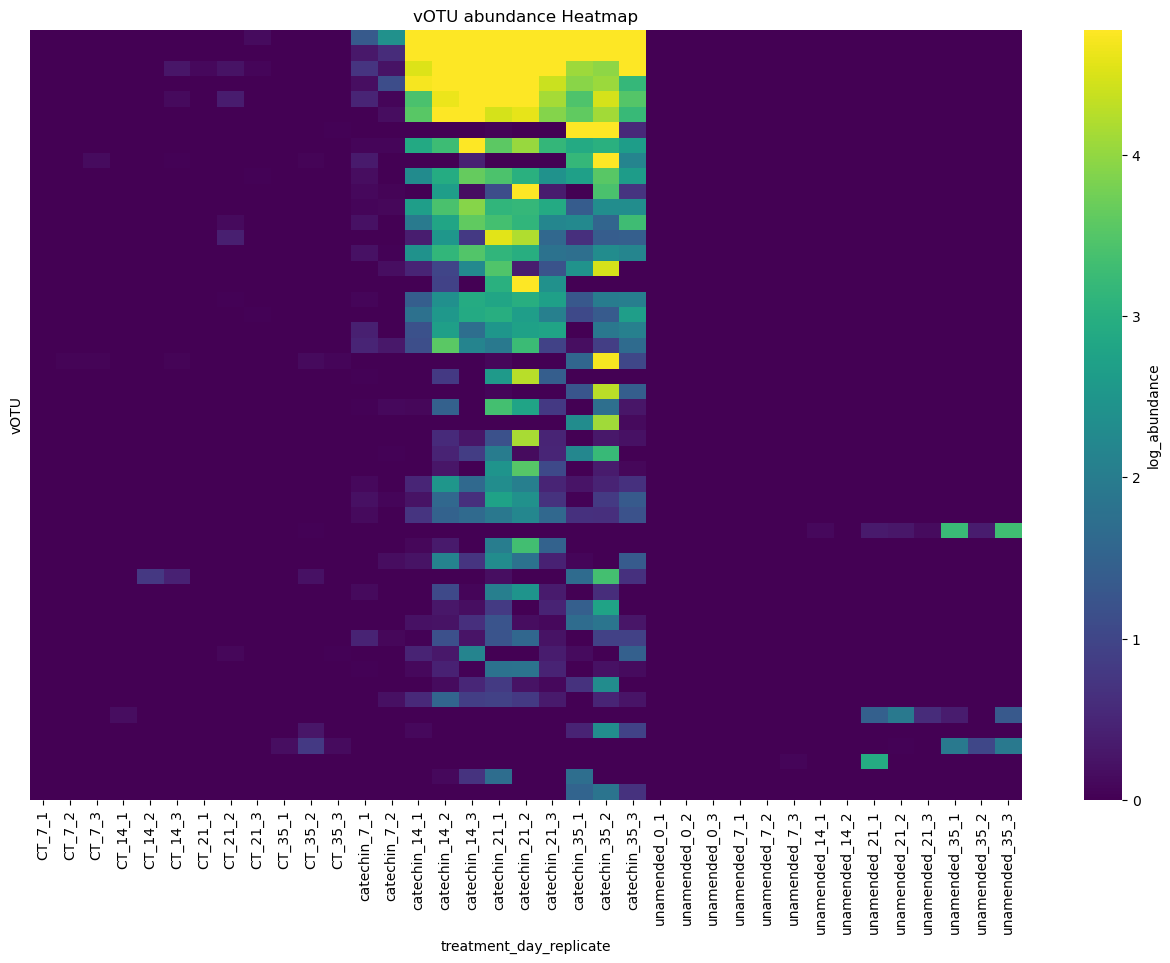

In [30]:
# Filter heatmap data for top differentiating vOTUs
heatmap_top = heatmap_data.loc[top_vOTUs_list, :]

# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_top, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Show plot
plt.show()

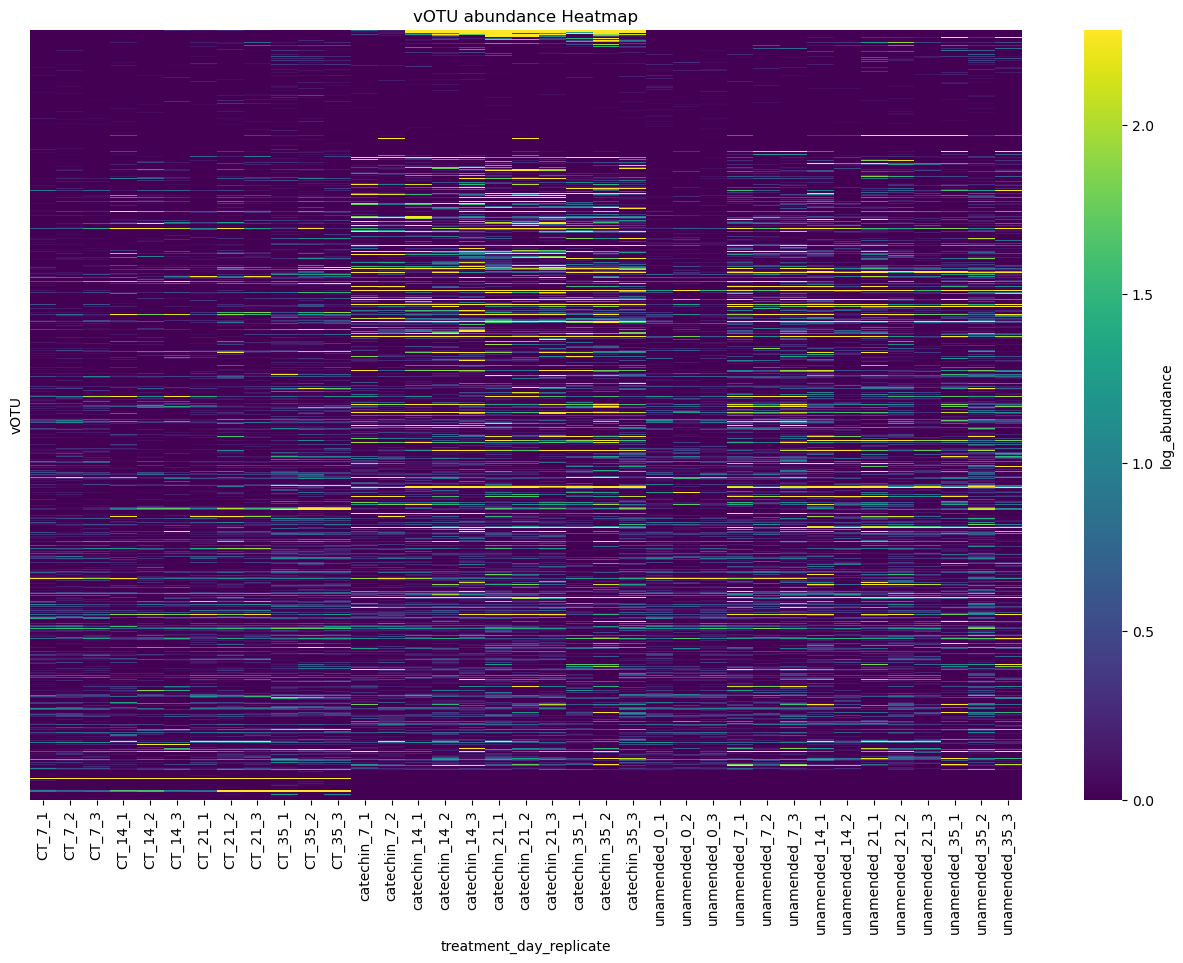

In [31]:
# Filter heatmap data for top differentiating vOTUs
heatmap_top = heatmap_data.loc[list(top_vOTUs['vOTU']), :]

# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_top, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Show plot
plt.show()

# Who are these viruses predicted to infect?

In [32]:
top_vOTUs = top_vOTUs.reset_index(drop=True)

In [33]:
stordalen_curated_iphop = pd.read_csv('../../data/03-predict-hosts/iphop_custom_predictions/stordalen_curated_iphop_metaT_1_gene_per_10_kb.tsv', sep='\t')
# Define the order of columns from highest to lowest resolution
taxonomy_columns = ['G', 'F', 'O', 'C', 'P']

# Create a new column with the highest resolution taxonomic value
def get_highest_resolution(row):
    for col in taxonomy_columns:
        if row[col] != f'{col.lower()}__':  # Check if the value is not the default prefix
            return row[col]
    return np.nan  # If no valid value is found, return NaN

stordalen_curated_iphop['highest_host_tax_rank'] = stordalen_curated_iphop.apply(get_highest_resolution, axis=1)

In [34]:
stordalen_curated_iphop = stordalen_curated_iphop.drop_duplicates(['vOTU', 'highest_host_tax_rank'])

In [35]:
top_vOTUs = top_vOTUs.merge(stordalen_curated_iphop[['vOTU', 'highest_host_tax_rank']], on='vOTU', how='left')

In [36]:
top_vOTUs['highest_host_tax_rank'] = top_vOTUs['highest_host_tax_rank'].fillna('no_prediction')

In [37]:
top_vOTUs

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank
0,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490,no_prediction
1,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356,g__JAGFXR01
2,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019,no_prediction
3,STM_0716_E_M_CoA1_E069_E065_megahit_k121_64172...,0.000001,23.412589,0.000001,24.480781,24.480781,24.480781,g__JAGFXR01
4,STM_0716_E_M_E050_E054_E058_A.contigs_1kb_k121...,0.030027,17.004416,0.000001,24.019406,9.145431,24.019406,g__JAGFXR01
...,...,...,...,...,...,...,...,...
3478,20110600_S1D.VIRSorter_NODE_4778_length_7106_c...,0.000265,0.000001,0.000001,0.000000,-8.049869,0.000000,g__Bog-532
3479,20120700_P3D.VIRSorter_NODE_76425_length_6564_...,0.000554,0.000001,0.000001,0.000000,-9.114326,0.000000,g__PALSA-129
3480,20120700_P3D.VIRSorter_NODE_89760_length_5784_...,0.000629,0.000001,0.000001,0.000000,-9.296652,0.000000,no_prediction
3481,20120700_P3D.VIRSorter_NODE_92294_length_5658_...,0.003050,0.000001,0.000001,0.000000,-11.574675,0.000000,f__Beijerinckiaceae


In [38]:
top_vOTUs = (
    top_vOTUs
    .groupby('vOTU', as_index=False)
    .agg({
    "CT": "first",
    "catechin": "first",
    "unamended": "first",
    "LFC_catechin_vs_unamended": "first",
    "LFC_catechin_vs_CT": "first",
    "LFC_catechin_vs_unamended_ABS": "first",
    "highest_host_tax_rank": lambda x: ";".join(x.unique()) # Concatenate unique tax ranks
    }) 
)

In [39]:
top_vOTUs = top_vOTUs.sort_values(by='LFC_catechin_vs_unamended_ABS', ascending=False)

In [40]:
top_vOTUs.iloc[:50,:].highest_host_tax_rank.value_counts()

no_prediction      34
g__JAGFXR01        14
g__UBA1794          1
g__Paludibacter     1
Name: highest_host_tax_rank, dtype: int64

In [41]:
top_vOTUs.highest_host_tax_rank.value_counts()

no_prediction                            1484
g__Clostridium                            434
g__Pseudomonas_E                          325
g__Terracidiphilus                        173
g__UBA1794                                 47
                                         ... 
g__Fen-178;g__Solibacter;g__PALSA-129       1
g__FEN-1088                                 1
g__Terracidiphilus;g__Bog-257               1
g__UBA700                                   1
f__PALSA-1337                               1
Name: highest_host_tax_rank, Length: 261, dtype: int64

# We will now take a more statistical approach: Indicator Species Analysis was performed to figure out which species are "indicators" of the catechin day 14-35 cluster. There were 1772 genes from 379 vOTUs that were statistically significant indicators of this cluster compared to the other 5, determined using AP cluster of bray-curtis distances. Let's plot these

In [42]:
indicators = pd.read_csv('../../data/01-build-vOTU-database/vOTUs/indicator_genes_per_cluster.csv')
indicators.head()

,gene,P_value,cluster,vOTU
0,10015_1,0.005,Cluster 1,STM_0716_E_M_CoAs_E001_E061_IS1_megahit_k121_2...
1,10015_2,0.035,Cluster 1,STM_0716_E_M_CoAs_E001_E061_IS1_megahit_k121_2...
2,10015_4,0.040,Cluster 1,STM_0716_E_M_CoAs_E001_E061_IS1_megahit_k121_2...
3,10015_8,0.045,Cluster 1,STM_0716_E_M_CoAs_E001_E061_IS1_megahit_k121_2...
4,10106_1,0.040,Cluster 1,20150700_S24.VIRSorter_NODE_5922_length_6277_c...


In [43]:
catechin_14_21_35 = indicators.loc[indicators['cluster'] == 'Cluster 2']

In [44]:
catechin_14_21_35.gene.nunique()

1785

In [45]:
catechin_14_21_35.P_value.value_counts()

0.005    826
0.010    171
0.015    135
0.035    112
0.030    105
0.020     98
0.040     97
0.045     95
0.025     75
0.050     71
Name: P_value, dtype: int64

In [46]:
catechin_14_21_35 = catechin_14_21_35.loc[catechin_14_21_35.P_value < 0.05]

In [47]:
indicator_vOTUs = catechin_14_21_35.vOTU.unique()

In [48]:
len(indicator_vOTUs)

367

In [49]:
for_cytoscape = pd.DataFrame(indicator_vOTUs)
for_cytoscape['cat_14_21_35_indicator'] = 'cat_indicator'

In [50]:
for_cytoscape.columns = ['name', 'cat_14_21_35_indicator']

In [51]:
for_cytoscape.to_csv('../../data/for_cytoscape_cat_14_21_35_indicators.csv')

In [52]:
indicator_vOTU_abund = top_vOTUs.loc[top_vOTUs['vOTU'].isin(indicator_vOTUs)]

In [53]:
indicator_vOTU_abund['vOTU'].nunique()

367

In [54]:
indicator_vOTU_abund

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank
2454,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490,no_prediction
2667,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356,g__JAGFXR01
2963,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019,no_prediction
1347,STM_0716_E_M_CoA1_E069_E065_megahit_k121_3875588,0.001265,9.550156,0.000001,23.187093,12.881850,23.187093,no_prediction
3003,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.000001,9.418774,0.000001,23.167108,23.167108,23.167108,no_prediction
...,...,...,...,...,...,...,...,...
3219,STM_0716_E_M_E069_IS1_megahit_k121_30907,0.524293,7.971867,6.695818,0.251657,3.926471,0.251657,g__Desulfitobacterium_A
2946,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.014940,1.028362,1.196470,-0.218435,6.105037,0.218435,g__Clostridium
3045,STM_0716_E_M_E054_A.contigs_1kb_k121_3726271,0.016889,0.101965,0.112805,-0.145753,2.593891,0.145753,g__Pseudomonas_E
2486,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_637029,0.360330,19.312206,17.617259,0.132523,5.744050,0.132523,g__Clostridium


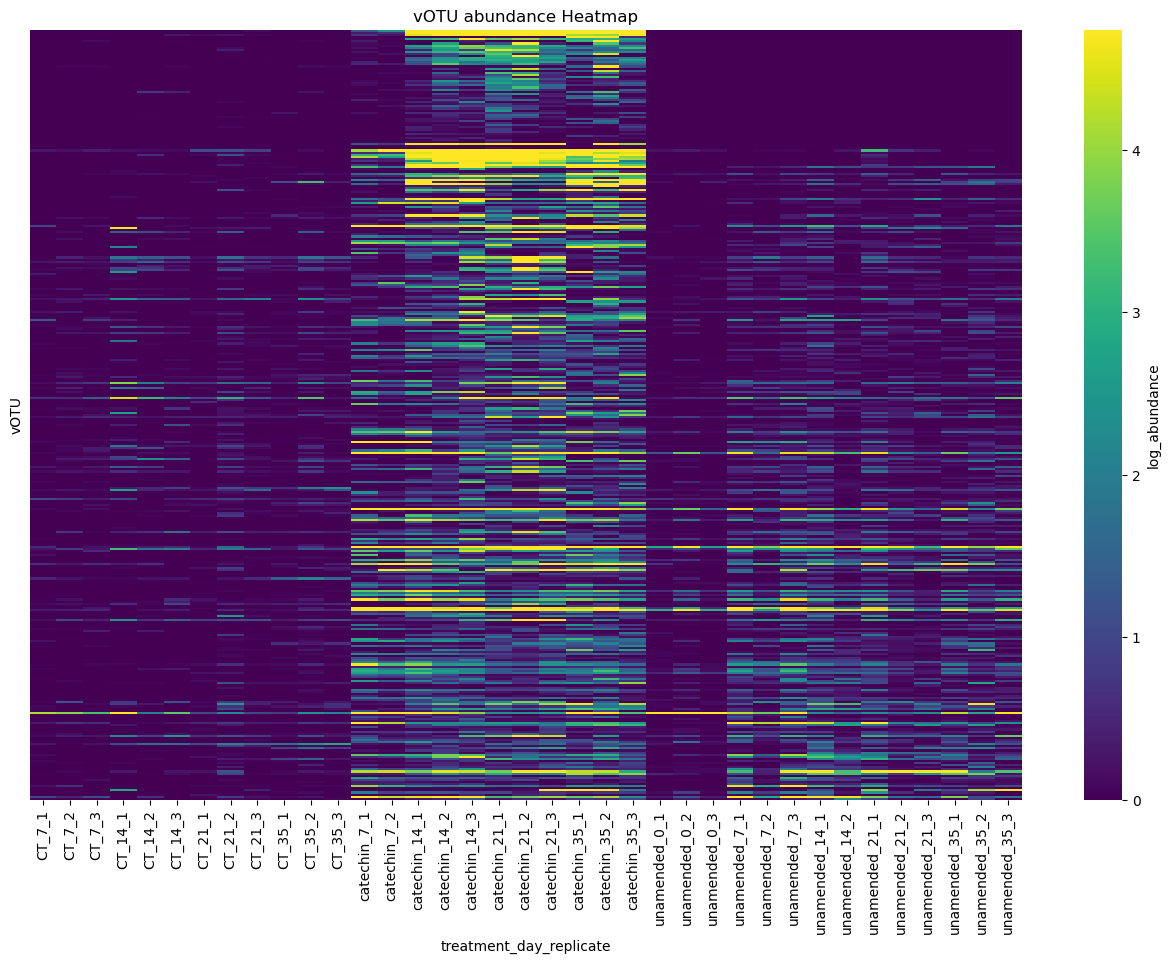

In [55]:
# plot again
# Filter heatmap data for top differentiating vOTUs
heatmap_top = heatmap_data.loc[list(indicator_vOTU_abund['vOTU']), :]

# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_top, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Show plot
plt.show()

# Only those with p-value < 0.01 this time

In [56]:
indicator_01 = indicators.loc[indicators['P_value'] < 0.01]['vOTU'].unique()
len(indicator_01)

591

In [57]:
indicator_vOTU_abund

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank
2454,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490,no_prediction
2667,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356,g__JAGFXR01
2963,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019,no_prediction
1347,STM_0716_E_M_CoA1_E069_E065_megahit_k121_3875588,0.001265,9.550156,0.000001,23.187093,12.881850,23.187093,no_prediction
3003,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.000001,9.418774,0.000001,23.167108,23.167108,23.167108,no_prediction
...,...,...,...,...,...,...,...,...
3219,STM_0716_E_M_E069_IS1_megahit_k121_30907,0.524293,7.971867,6.695818,0.251657,3.926471,0.251657,g__Desulfitobacterium_A
2946,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.014940,1.028362,1.196470,-0.218435,6.105037,0.218435,g__Clostridium
3045,STM_0716_E_M_E054_A.contigs_1kb_k121_3726271,0.016889,0.101965,0.112805,-0.145753,2.593891,0.145753,g__Pseudomonas_E
2486,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_637029,0.360330,19.312206,17.617259,0.132523,5.744050,0.132523,g__Clostridium


367


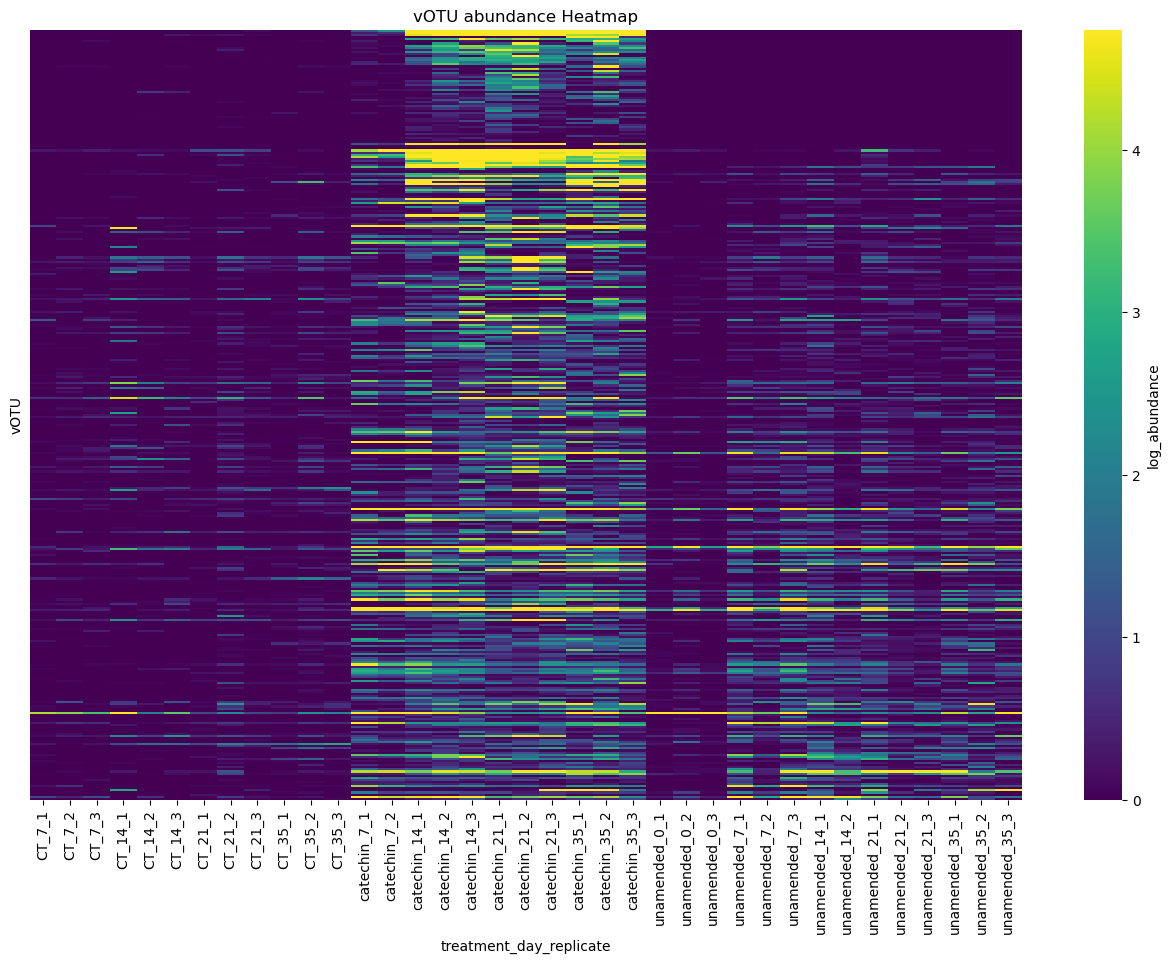

In [58]:
# Plot the top 
# Filter heatmap data for top differentiating vOTUs
heatmap_top = heatmap_data.loc[list(indicator_vOTU_abund['vOTU']), :]
print(len(heatmap_top))
# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_top, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Show plot
plt.show()

367


/Users/riddellj/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1600x1000 with 0 Axes>

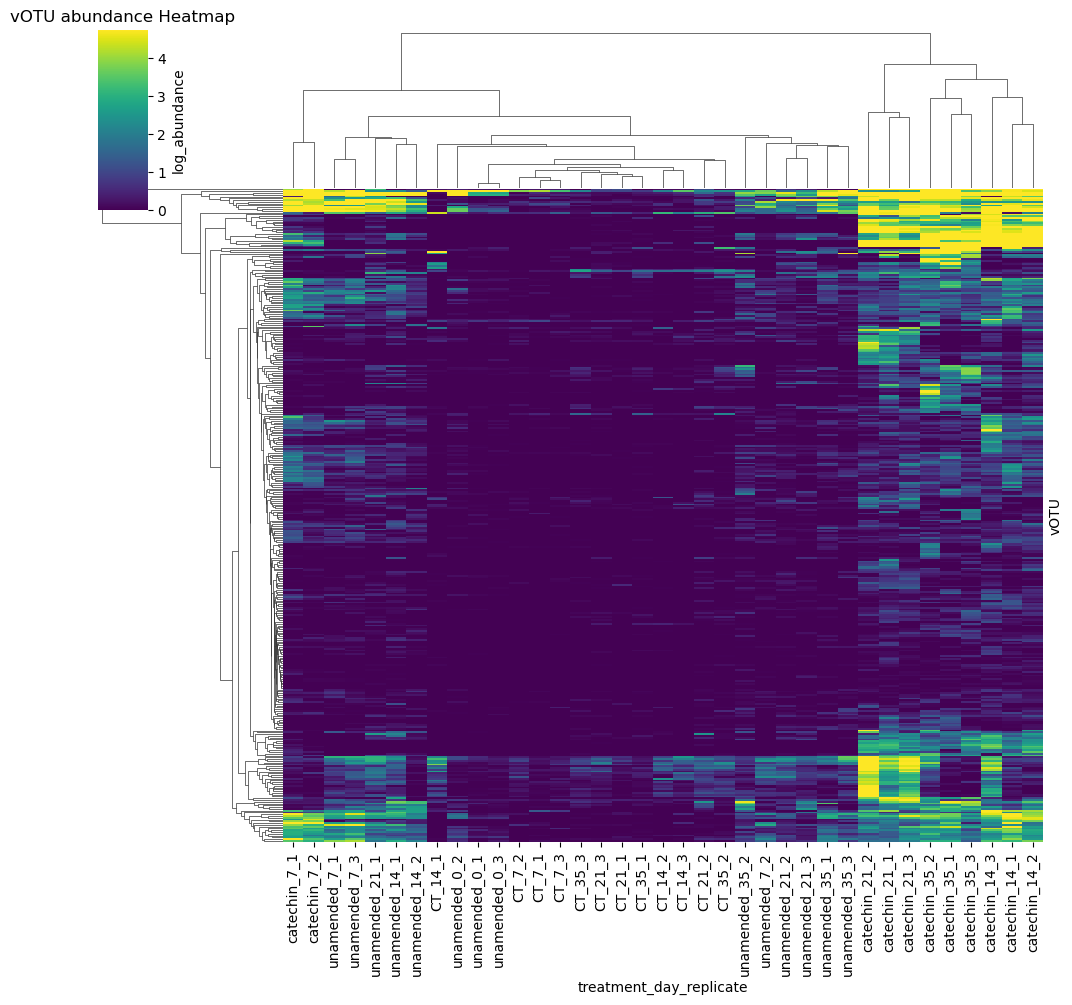

In [59]:
# Plot the top 
# Filter heatmap data for top differentiating vOTUs
heatmap_top = heatmap_data.loc[list(indicator_vOTU_abund['vOTU']), :]
print(len(heatmap_top))
# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.clustermap(heatmap_top, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Show plot
plt.show()

367


/Users/riddellj/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1600x1000 with 0 Axes>

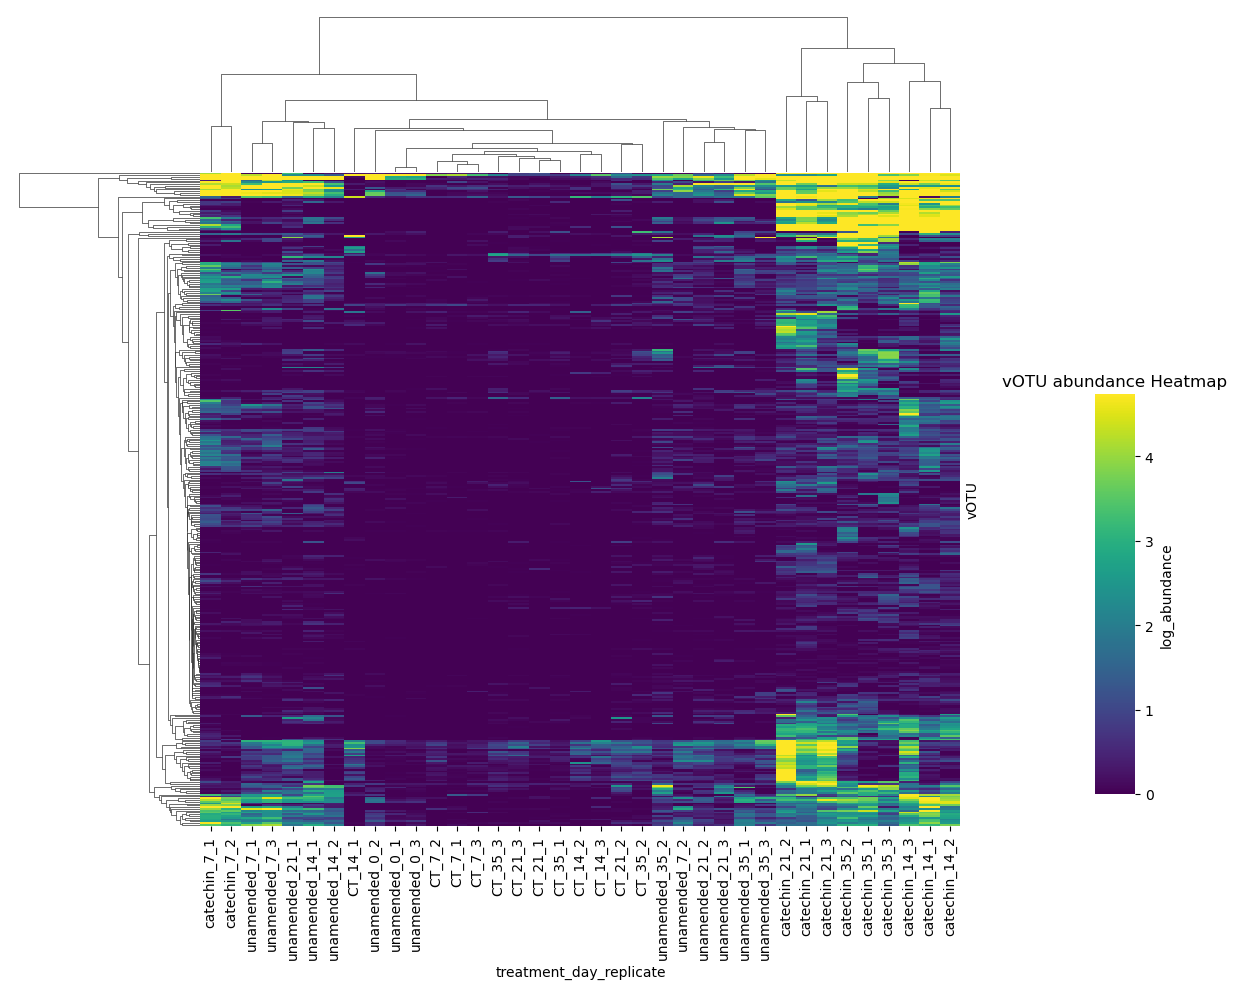

In [60]:
# Plot the top differentiating vOTUs
heatmap_top = heatmap_data.loc[list(indicator_vOTU_abund['vOTU']), :]
print(len(heatmap_top))

# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.clustermap(heatmap_top, cmap="viridis", robust=True, cbar_pos=(1.1, 0.2, 0.04, 0.4), 
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("vOTU abundance Heatmap")

# Adjust the colorbar placement
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label("log_abundance")  # Add label to the colorbar

# Show plot
plt.show()


In [61]:
indicator_vOTU_abund.head()

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank
2454,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490,no_prediction
2667,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356,g__JAGFXR01
2963,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019,no_prediction
1347,STM_0716_E_M_CoA1_E069_E065_megahit_k121_3875588,0.001265,9.550156,0.000001,23.187093,12.881850,23.187093,no_prediction
3003,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.000001,9.418774,0.000001,23.167108,23.167108,23.167108,no_prediction


In [62]:
indicator_vOTU_abund.sort_values(by='catechin', ascending=False)[['highest_host_tax_rank', 'catechin']]

,highest_host_tax_rank,catechin
2618,g__UBA1794,6248.452934
2062,no_prediction,560.126663
2454,no_prediction,534.824267
1387,g__Clostridium,277.079673
3111,g__Clostridium,274.231000
...,...,...
3205,no_prediction,0.031268
2627,no_prediction,0.021186
2112,g__Clostridium,0.018806
2696,no_prediction,0.014365


In [63]:
print(list(indicator_vOTU_abund.sort_values(by='catechin', ascending=False)['highest_host_tax_rank']))

['g__UBA1794', 'no_prediction', 'no_prediction', 'g__Clostridium', 'g__Clostridium', 'g__JAGFXR01', 'g__JAGFXR01', 'g__JAEXAI01', 'no_prediction', 'no_prediction', 'no_prediction', 'g__Clostridium', 'no_prediction', 'g__Clostridium', 'g__Clostridium', 'g__Clostridium', 'g__JAGFXR01', 'g__Pelorhabdus', 'no_prediction', 'g__Clostridium', 'g__Pseudomonas_E', 'g__Clostridium', 'g__JAGFXR01', 'no_prediction', 'g__Clostridium', 'no_prediction', 'g__JAGFXR01', 'g__Pseudomonas_E', 'no_prediction', 'g__Pseudomonas_E', 'g__Clostridium', 'g__Clostridium', 'g__Clostridium', 'g__JAEXAI01', 'g__JAGFXR01', 'g__Pseudomonas_E', 'g__Pseudomonas_E', 'no_prediction', 'g__Clostridium', 'g__Pseudomonas_E', 'g__Pseudomonas_E', 'no_prediction', 'g__Clostridium', 'g__Clostridium', 'g__Clostridium', 'no_prediction', 'no_prediction', 'no_prediction', 'g__Clostridium', 'g__Pseudomonas_E', 'g__UBA1794', 'no_prediction', 'g__Clostridium', 'no_prediction', 'g__Desulfitobacterium_A', 'g__Pseudomonas_E', 'no_predictio

In [64]:
indicator_vOTU_abund.sort_values(by='catechin', ascending=False)['highest_host_tax_rank'].value_counts()

no_prediction                      127
g__Clostridium                     121
g__Pseudomonas_E                    51
g__UBA1794                          23
g__JAGFXR01                         17
g__Terracidiphilus                   4
g__JAATFL01                          3
g__Rahnella                          3
g__Desulfitobacterium_A              2
g__Ruminiclostridium_D               2
g__Pelorhabdus                       2
g__JAEXAI01                          2
g__Caproiciproducens                 2
g__JACMJL01                          2
g__UBA1794;g__JAAYUD01               1
g__PALSA-350;g__Terracidiphilus      1
g__UBA1794;g__Paludibacter           1
g__Prevotella                        1
g__Enterobacter;g__Rahnella          1
f__RUG844                            1
Name: highest_host_tax_rank, dtype: int64

In [65]:
indicator_vOTU_abund.highest_host_tax_rank.value_counts()

no_prediction                      127
g__Clostridium                     121
g__Pseudomonas_E                    51
g__UBA1794                          23
g__JAGFXR01                         17
g__Terracidiphilus                   4
g__Rahnella                          3
g__JAATFL01                          3
g__JACMJL01                          2
g__Ruminiclostridium_D               2
g__Caproiciproducens                 2
g__JAEXAI01                          2
g__Desulfitobacterium_A              2
g__Pelorhabdus                       2
f__RUG844                            1
g__Prevotella                        1
g__Enterobacter;g__Rahnella          1
g__UBA1794;g__Paludibacter           1
g__PALSA-350;g__Terracidiphilus      1
g__UBA1794;g__JAAYUD01               1
Name: highest_host_tax_rank, dtype: int64

# What is so special about these vOTUs? Why are they enriched when others are not?

Possible reasons:
1. Their hosts are enriched
2. Some kind of stressor induced them

# Need to run statistical tests to determine why these are different

- Host activity
- Length
- Taxonomy
- Functions


# Is there a clear difference in who these vOTUs infect?

In [66]:
top_vOTUs['indicator_vOTU'] = top_vOTUs['vOTU'].isin(indicator_vOTUs)

In [67]:
top_vOTUs

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank,indicator_vOTU
2454,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490,no_prediction,True
2667,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356,g__JAGFXR01,True
2963,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019,no_prediction,True
1357,STM_0716_E_M_CoA1_E069_E065_megahit_k121_64172...,0.000001,23.412589,0.000001,24.480781,24.480781,24.480781,g__JAGFXR01,False
2791,STM_0716_E_M_E050_E054_E058_A.contigs_1kb_k121...,0.030027,17.004416,0.000001,24.019406,9.145431,24.019406,g__JAGFXR01,False
...,...,...,...,...,...,...,...,...,...
749,20160700_E25.VIRSorter_NODE_9862_length_5829_c...,0.003691,0.000001,0.000001,0.000000,-11.849667,0.000000,g__Terracidiphilus,False
758,20160700_P15.VIRSorter_NODE_4206_length_9246_c...,0.001560,0.000001,0.000001,0.000000,-10.607590,0.000000,no_prediction,False
759,20160700_P15.VIRSorter_NODE_4248_length_9188_c...,0.003613,0.000001,0.000001,0.000000,-11.819157,0.000000,g__Terracidiphilus,False
760,20160700_P15.VIRSorter_NODE_4677_length_8555_c...,0.002006,0.000001,0.000001,0.000000,-10.970215,0.000000,no_prediction,False


In [68]:
top_vOTUs.loc[top_vOTUs['indicator_vOTU'] == True]['highest_host_tax_rank'].value_counts()

no_prediction                      127
g__Clostridium                     121
g__Pseudomonas_E                    51
g__UBA1794                          23
g__JAGFXR01                         17
g__Terracidiphilus                   4
g__Rahnella                          3
g__JAATFL01                          3
g__JACMJL01                          2
g__Ruminiclostridium_D               2
g__Caproiciproducens                 2
g__JAEXAI01                          2
g__Desulfitobacterium_A              2
g__Pelorhabdus                       2
f__RUG844                            1
g__Prevotella                        1
g__Enterobacter;g__Rahnella          1
g__UBA1794;g__Paludibacter           1
g__PALSA-350;g__Terracidiphilus      1
g__UBA1794;g__JAAYUD01               1
Name: highest_host_tax_rank, dtype: int64

In [69]:
top_vOTUs.loc[top_vOTUs['indicator_vOTU'] == False]['highest_host_tax_rank'].value_counts().head(20)

no_prediction         1357
g__Clostridium         313
g__Pseudomonas_E       274
g__Terracidiphilus     169
g__CAIVVT01             28
g__UBA1794              24
g__Paludibacter         23
g__UBA11358             23
g__Fen-1039             22
g__PALSA-986            19
g__LD21                 17
g__Smithella            16
g__Fen-1137             15
g__UBA7542              13
g__Bog-366              13
g__Fen-178              12
g__PALSA-129            12
g__Mycobacterium        12
g__Solibacter           12
g__Clostridium_AM       11
Name: highest_host_tax_rank, dtype: int64

# There's still other vOTUs infecting the same hosts that are not indicators though. Does that matter? Should we try to figure out what the differences are?

In [70]:
top_vOTUs

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank,indicator_vOTU
2454,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_4097445,0.008315,534.824267,0.000001,28.994490,15.972948,28.994490,no_prediction,True
2667,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.000997,208.772440,0.000001,27.637356,17.675406,27.637356,g__JAGFXR01,True
2963,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.041436,25.874347,0.000001,24.625019,9.286431,24.625019,no_prediction,True
1357,STM_0716_E_M_CoA1_E069_E065_megahit_k121_64172...,0.000001,23.412589,0.000001,24.480781,24.480781,24.480781,g__JAGFXR01,False
2791,STM_0716_E_M_E050_E054_E058_A.contigs_1kb_k121...,0.030027,17.004416,0.000001,24.019406,9.145431,24.019406,g__JAGFXR01,False
...,...,...,...,...,...,...,...,...,...
749,20160700_E25.VIRSorter_NODE_9862_length_5829_c...,0.003691,0.000001,0.000001,0.000000,-11.849667,0.000000,g__Terracidiphilus,False
758,20160700_P15.VIRSorter_NODE_4206_length_9246_c...,0.001560,0.000001,0.000001,0.000000,-10.607590,0.000000,no_prediction,False
759,20160700_P15.VIRSorter_NODE_4248_length_9188_c...,0.003613,0.000001,0.000001,0.000000,-11.819157,0.000000,g__Terracidiphilus,False
760,20160700_P15.VIRSorter_NODE_4677_length_8555_c...,0.002006,0.000001,0.000001,0.000000,-10.970215,0.000000,no_prediction,False


In [71]:
top_vOTUs.to_csv('../../data/01-build-vOTU-database/vOTUs/vOTU_host_indicator.csv', index=False)

### Explore just Clostridium

In [72]:
top_vOTUs.loc[top_vOTUs['highest_host_tax_rank'] == 'g__Clostridium']

,vOTU,CT,catechin,unamended,LFC_catechin_vs_unamended,LFC_catechin_vs_CT,LFC_catechin_vs_unamended_ABS,highest_host_tax_rank,indicator_vOTU
1763,STM_0716_E_M_E026_E030_E034_A.contigs_1kb_k121...,0.000001,0.064924,0.000001,15.986471,15.986471,15.986471,g__Clostridium,False
1920,STM_0716_E_M_E026_E030_E034_D.contigs_1kb_k121...,0.000001,0.037648,0.000001,15.200284,15.200284,15.200284,g__Clostridium,False
3132,STM_0716_E_M_E061_IS1_megahit_k121_2261820,0.000001,0.029883,0.000001,14.867046,14.867046,14.867046,g__Clostridium,False
2398,STM_0716_E_M_E034_E058_A.contigs_1kb_k121_1043656,0.000001,0.024576,0.000001,14.584951,14.584951,14.584951,g__Clostridium,False
2993,STM_0716_E_M_E050_E054_E058_D.contigs_1kb_k121...,0.000001,0.000001,0.022344,-14.447588,0.000000,14.447588,g__Clostridium,False
...,...,...,...,...,...,...,...,...,...
1662,STM_0716_E_M_E026_A.contigs_1kb_k121_1559273,0.000001,0.036435,0.037460,-0.040045,15.153024,0.040045,g__Clostridium,False
1686,STM_0716_E_M_E026_A.contigs_1kb_k121_296694,0.000001,1.173839,1.162558,0.013931,20.162803,0.013931,g__Clostridium,False
2614,STM_0716_E_M_E034_E058_E069_D.contigs_1kb_k121...,0.001674,3.189856,3.170433,0.008811,10.896259,0.008811,g__Clostridium,False
1666,STM_0716_E_M_E026_A.contigs_1kb_k121_1613013,0.000879,0.051200,0.051490,-0.008147,5.864228,0.008147,g__Clostridium,False


434


/Users/riddellj/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1600x1000 with 0 Axes>

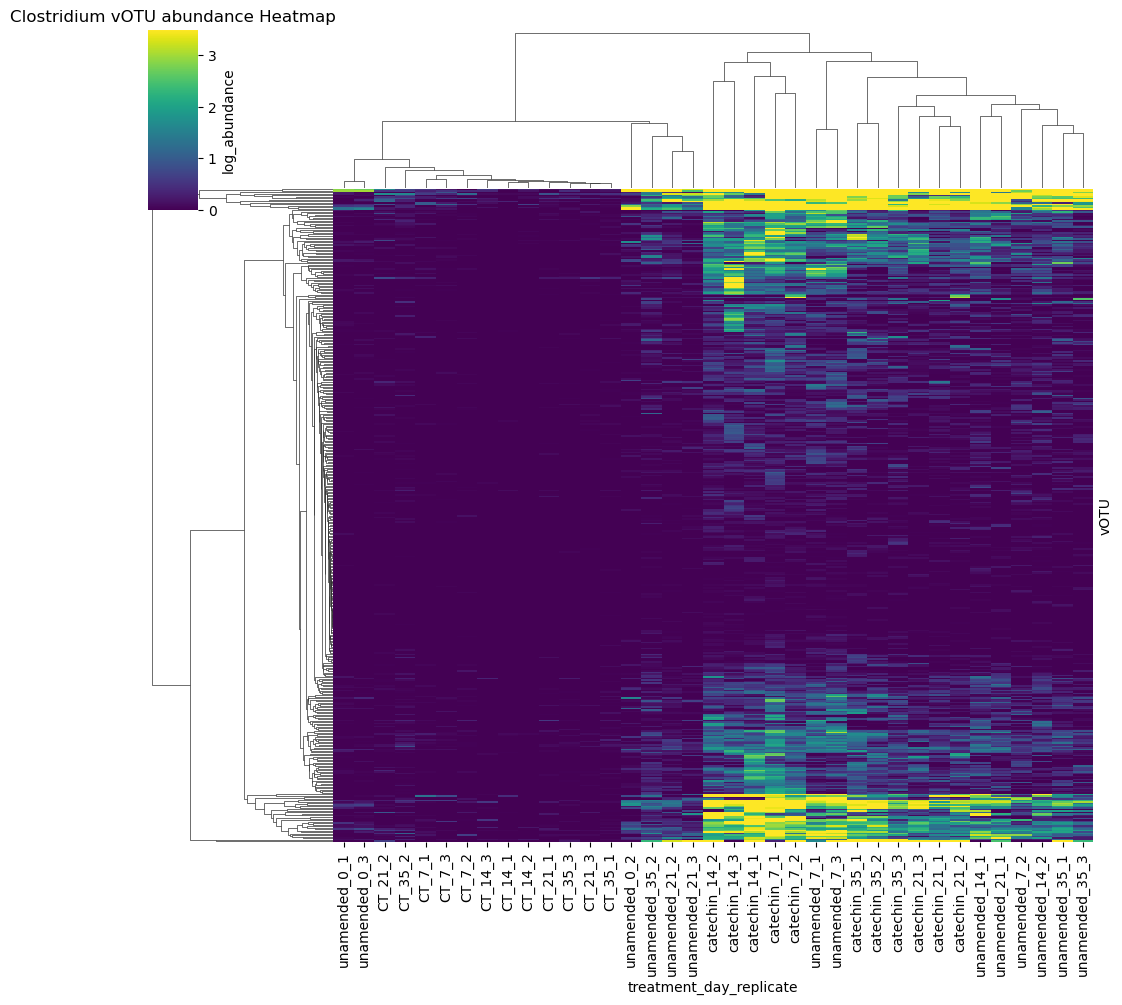

In [73]:
# Plot the top 
# Filter heatmap data for top differentiating vOTUs
heatmap_clos = heatmap_data.loc[list(top_vOTUs.loc[top_vOTUs['highest_host_tax_rank'] == 'g__Clostridium']['vOTU']), :]
print(len(heatmap_clos))
# Plot heatmap with reversed colormap and no y-axis labels
plt.figure(figsize=(16, 10))
ax = sns.clustermap(heatmap_clos, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                    yticklabels=False)  # Remove y-axis labels

# Rotate x-axis labels for readability
# plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

# Set title
plt.title("Clostridium vOTU abundance Heatmap")

# Show plot
plt.show()

In [74]:
# Plot the top 


def plot_heatmap(host):

    # Filter heatmap data for top differentiating vOTUs
    heatmap_clos = heatmap_data.loc[list(top_vOTUs.loc[top_vOTUs['highest_host_tax_rank'] == host]['vOTU']), :]
    print(len(heatmap_clos))
    # Plot heatmap with reversed colormap and no y-axis labels
    plt.figure(figsize=(16, 10))
    ax = sns.clustermap(heatmap_clos, cmap="viridis", robust=True, cbar_kws={"label": "log_abundance"},
                        yticklabels=False)  # Remove y-axis labels

    # Rotate x-axis labels for readability
    # plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=10, ha="right")

    # Set title
    plt.title(f"{host} vOTU abundance Heatmap")

    # Show plot
    plt.show()

5


<Figure size 1600x1000 with 0 Axes>

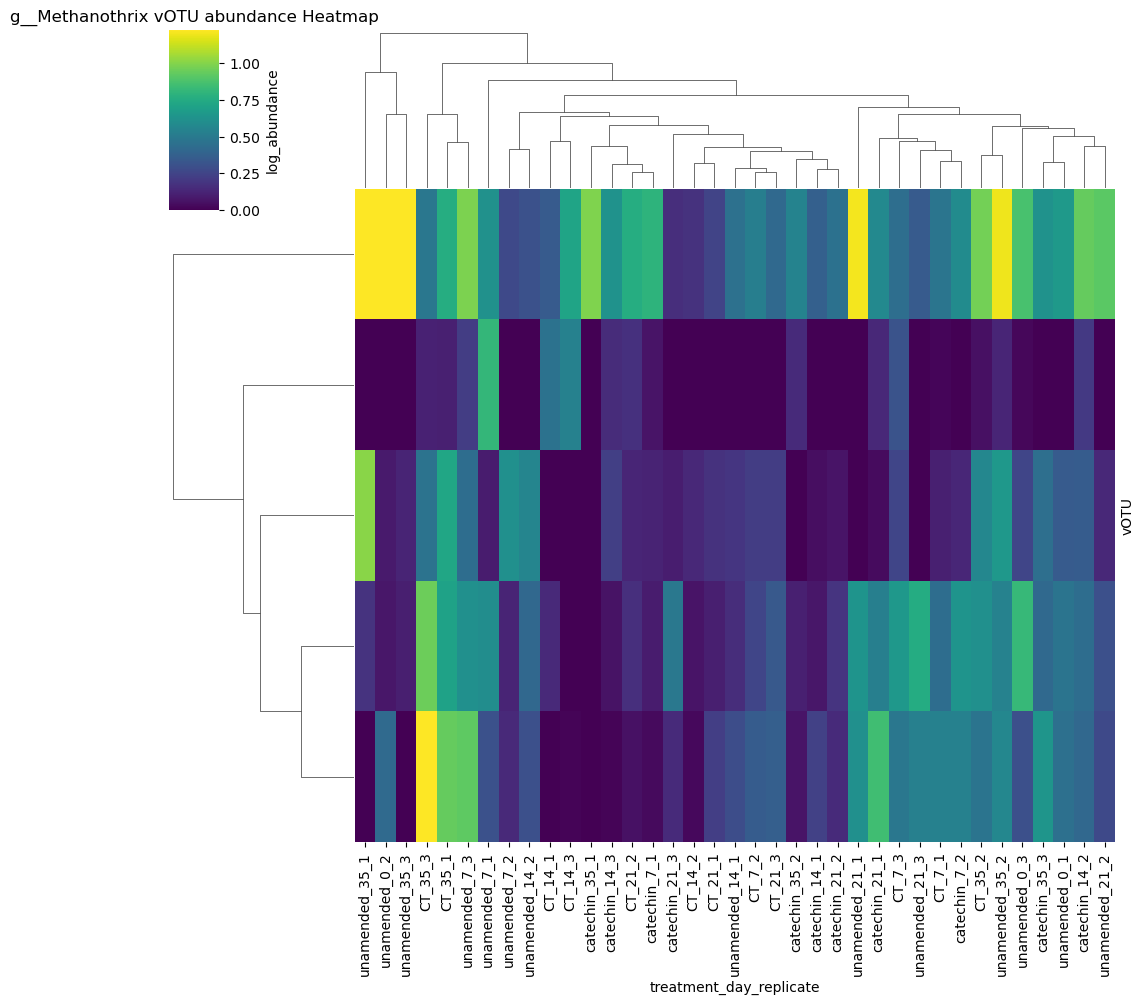

In [75]:
plot_heatmap('g__Methanothrix')

23


<Figure size 1600x1000 with 0 Axes>

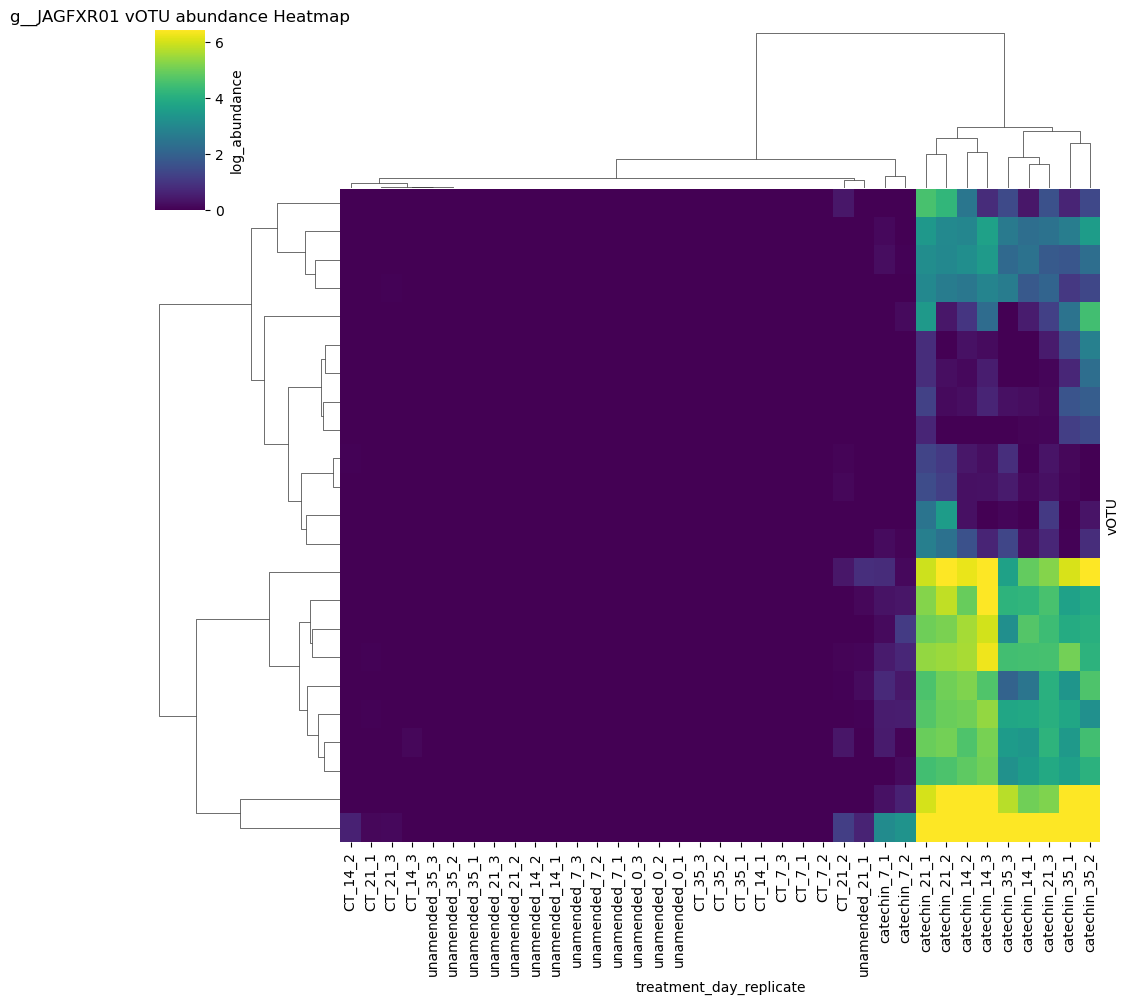

In [76]:
plot_heatmap('g__JAGFXR01')

47


<Figure size 1600x1000 with 0 Axes>

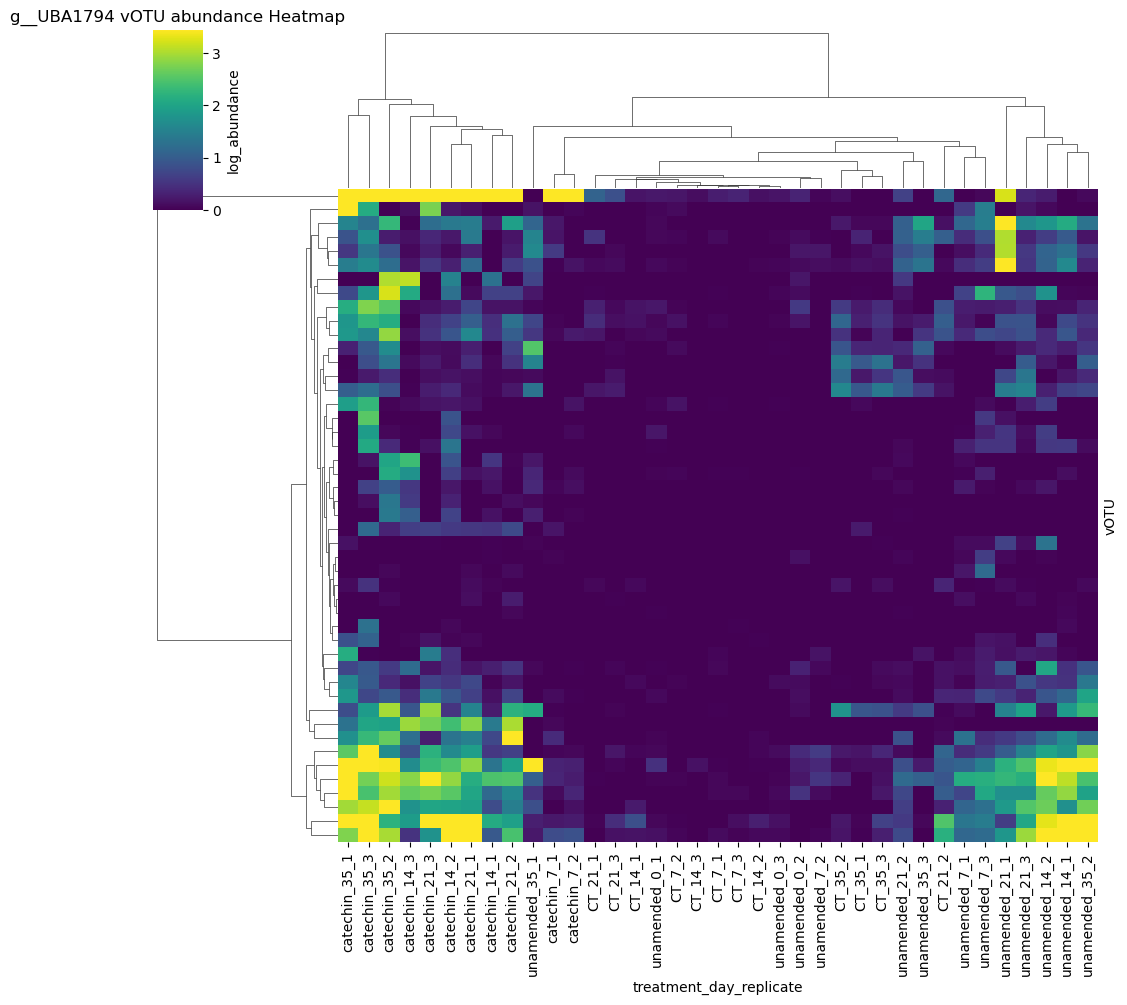

In [77]:
plot_heatmap('g__UBA1794')